In [1]:
%load_ext autoreload
%autoreload 2

from preprocess import *
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical

Using TensorFlow backend.


In [2]:
# Second dimension of the feature is dim2
feature_dim_2 = 11

In [3]:
# Save data to array file first
save_data_to_array(max_len=feature_dim_2)

Saving vectors of label - 'oui': 100%|██████████| 1651/1651 [01:21<00:00, 20.17it/s]


In [4]:
# # Loading train set and test set
X_train, X_test, y_train, y_test = get_train_test()

# # Feature dimension
feature_dim_1 = 20
channel = 1
epochs = 15
batch_size = 100
verbose = 1
num_classes = 8

# Reshaping to perform 2D convolution
X_train = X_train.reshape(X_train.shape[0], feature_dim_1, feature_dim_2, channel)
X_test = X_test.reshape(X_test.shape[0], feature_dim_1, feature_dim_2, channel)

y_train_hot = to_categorical(y_train)
y_test_hot = to_categorical(y_test)

In [5]:
def get_model():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(2, 2), activation='relu', input_shape=(feature_dim_1, feature_dim_2, channel)))
    model.add(Conv2D(48, kernel_size=(2, 2), activation='relu'))
    model.add(Conv2D(120, kernel_size=(2, 2), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(),
                  metrics=['accuracy'])
    return model

# Predicts one sample
def predict(filepath, model):
    sample = wav2mfcc(filepath)
    sample_reshaped = sample.reshape(1, feature_dim_1, feature_dim_2, channel)
    return get_labels()[0][
            np.argmax(model.predict(sample_reshaped))
    ]

# Building The Model Then Training it

In [6]:
model = get_model()
Model1 = model.fit(
    X_train, y_train_hot, 
    batch_size=batch_size, 
    epochs=epochs, 
    verbose=verbose, 
    validation_data=(X_test, y_test_hot)
)

Train on 8119 samples, validate on 5414 samples
Epoch 1/15
8119/8119 [==============================] - 7s 884us/step - loss: 1.5159 - acc: 0.4860 - val_loss: 0.7602 - val_acc: 0.7590
Epoch 2/15
8119/8119 [==============================] - 8s 1ms/step - loss: 0.5893 - acc: 0.8090 - val_loss: 0.1922 - val_acc: 0.9505
Epoch 3/15
8119/8119 [==============================] - 10s 1ms/step - loss: 0.2944 - acc: 0.9090 - val_loss: 0.0872 - val_acc: 0.9764
Epoch 4/15
8119/8119 [==============================] - 9s 1ms/step - loss: 0.1638 - acc: 0.9528 - val_loss: 0.1281 - val_acc: 0.9571
Epoch 5/15
8119/8119 [==============================] - 8s 945us/step - loss: 0.1096 - acc: 0.9665 - val_loss: 0.0453 - val_acc: 0.9856
Epoch 6/15
8119/8119 [==============================] - 8s 964us/step - loss: 0.0828 - acc: 0.9722 - val_loss: 0.0307 - val_acc: 0.9919
Epoch 7/15
8119/8119 [==============================] - 9s 1ms/step - loss: 0.0618 - acc: 0.9808 - val_loss: 0.0266 - val_acc: 0.9943
Epoch 8

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 19, 10, 32)        160       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 18, 9, 48)         6192      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 17, 8, 120)        23160     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 4, 120)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 4, 120)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3840)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               491648    
__________

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

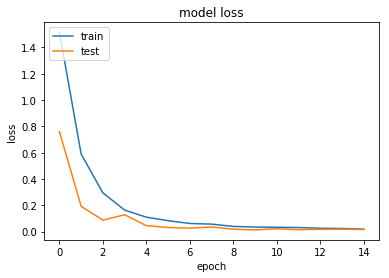

In [9]:
plt.plot(Model1.history['loss'])
plt.plot(Model1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

## Prediction

In [10]:
print(predict('mixes/droite/droite_mathilde_01_09.wav', model=model))

droite


In [11]:
print(predict('data/test/test-01.wav', model=model)) #bonjour
print(predict('data/test/test-02.wav', model=model)) #au revoir
print(predict('data/test/test-03.wav', model=model)) #a gauche
print(predict('data/test/test-04.wav', model=model)) #a droite
print(predict('data/test/steven_test-01.wav', model=model)) #oui
print(predict('data/test/steven_test-02.wav', model=model)) #oui

bonjour
aurevoir
gauche
droite
oui
oui


In [12]:
model.save("model.h5")